Haunted Places

In [18]:
import pandas as pd
import folium 

In [19]:
df = pd.read_csv('F:\\d10\\Projects\\bigfoots-ufos-ghosts-oh-my\\data\\haunted_places_2.csv')

In [20]:
df.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,location_2,city_location
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,POINT(-85.50489309999999 42.9621061),POINT(-85.4954803 42.960727)
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434,POINT(-84.3818434 41.9714248),POINT(-84.3471684 41.986434)
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547,POINT(-84.03565619999999 41.904538),POINT(-84.03716589999999 41.8975471)
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,POINT(-84.0175653 41.9057124),POINT(-84.03716589999999 41.8975471)
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,POINT(-84.7451775 42.2440064),POINT(-84.7530304 42.243097)


In [21]:
cleaned_df = df.dropna(subset=['latitude', 'longitude'])


In [22]:
cleaned_df.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,location_2,city_location
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,POINT(-85.50489309999999 42.9621061),POINT(-85.4954803 42.960727)
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434,POINT(-84.3818434 41.9714248),POINT(-84.3471684 41.986434)
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547,POINT(-84.03565619999999 41.904538),POINT(-84.03716589999999 41.8975471)
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,POINT(-84.0175653 41.9057124),POINT(-84.03716589999999 41.8975471)
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,POINT(-84.7451775 42.2440064),POINT(-84.7530304 42.243097)


In [23]:
cleaned_df = df.dropna(subset=['latitude', 'longitude'])
# 200 points at first because computer froze last time 
num_rows = min(500, len(cleaned_df))


if not cleaned_df.empty:
    first_point = cleaned_df.iloc[0]
    m = folium.Map(location=[first_point['latitude'], first_point['longitude']], zoom_start=5)

    # 1st 200 rows to be marked
    for index, row in cleaned_df.iloc[:num_rows].iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)

  

    
    display(m)
else:
    print("you messed up, buddy.")

In [24]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seanm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seanm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

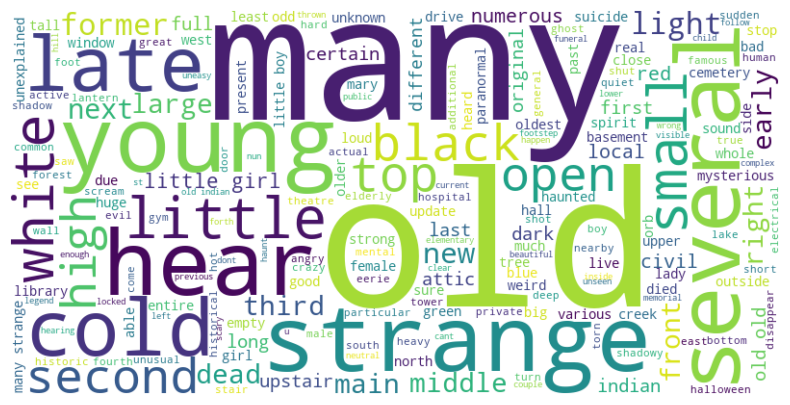

In [27]:
def preprocess_text(text):
    
    if pd.isnull(text):
        text = ''  
    else:
        text = str(text)  
    
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def extract_adjectives(tokens):
    tagged = nltk.pos_tag(tokens)
    adjectives = [word for word, tag in tagged if tag in ('JJ', 'JJR', 'JJS')]
    return adjectives

def generate_word_cloud(adjectives):
    text = ' '.join(adjectives)
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



all_adjectives = []

for index, row in df.iterrows():
    text = row['description']  
    tokens = preprocess_text(text)
    adjectives = extract_adjectives(tokens)
    all_adjectives.extend(adjectives)

generate_word_cloud(all_adjectives)